# Importy

In [85]:
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



# Otworzenie zadanych obrazów

36


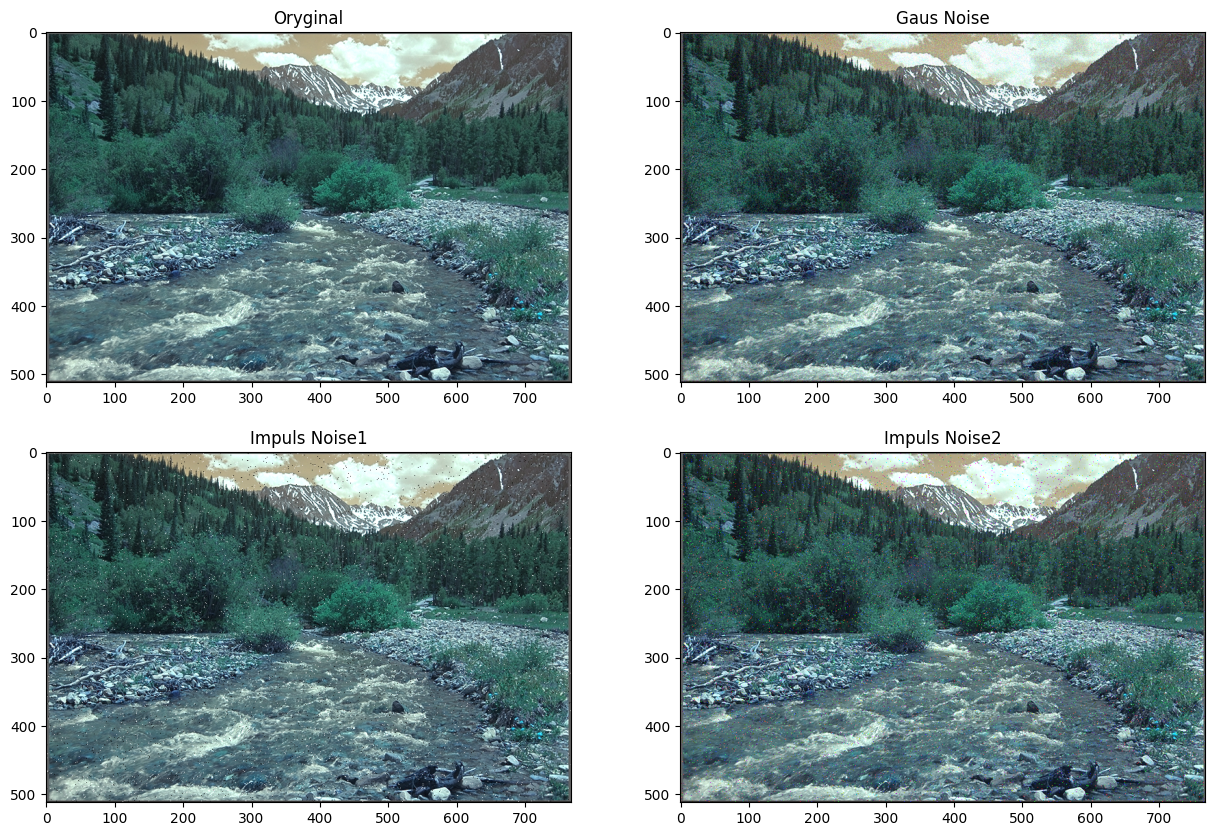

In [86]:
images_dir = Path("obrazy_testowe")
oryginal_dir = images_dir / "color"
inoise1_dir = images_dir / "color_inoise1"
inoise2_dir = images_dir / "color_inoise2"
noise_dir = images_dir / "color_noise"

oryginal_imgs = sorted(list(oryginal_dir.glob("*.png")))
inoise1_imgs = sorted(list(inoise1_dir.glob("*.png")))
inoise2_imgs = sorted(list(inoise2_dir.glob("*.png")))
noise_imgs = sorted(list(noise_dir.glob("*.png")))

id_number = 325203
number_of_imgs = len(oryginal_imgs)
img_nr = id_number % number_of_imgs
print(number_of_imgs)


oryginal_img = cv2.imread(str(oryginal_imgs[img_nr]), cv2.IMREAD_UNCHANGED)
inoise1_img = cv2.imread(str(inoise1_imgs[img_nr]), cv2.IMREAD_UNCHANGED)
inoise2_img = cv2.imread(str(inoise2_imgs[img_nr]), cv2.IMREAD_UNCHANGED)
gaus_noise_img = cv2.imread(str(noise_imgs[img_nr]), cv2.IMREAD_UNCHANGED)

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.title('Oryginal')
plt.imshow(oryginal_img)
plt.subplot(2, 2, 2)
plt.title('Gaus Noise')
plt.imshow(gaus_noise_img)
plt.subplot(2, 2, 3)
plt.title('Impuls Noise1')
plt.imshow(inoise1_img)
plt.subplot(2, 2, 4)
plt.title('Impuls Noise2')
plt.imshow(inoise2_img)


# Zad1


## Treść

Zrealizować operację filtracji barwnego obrazu cyfrowego.   
Do realizacji zadania wykorzystać obrazy zaszumione (szumem gaussowskim oraz impulsowym).  
Każdy  z  obrazów  wejściowych  poddać  przetwarzaniu  filtrem  wygładzającym  (Gaussa)  i  filtrem 
medianowym. Każdy obraz wynikowy wyświetlić i obliczyć dla niego PSNR (w stosunku do obrazu 
oryginalnego,  nie  zaszumionego!,  funkcja do  obliczania PSNR  dostępna  jest  w  przykładowym 
skrypcie). Ocenić działanie filtrów dla masek o rozmiarach: 3x3, 5x5, 7x7.  
Zebrać w tabeli PSNR dla różnych rodzajów szumów, filtrów i rozmiarów maski.  
Jaki wpływ na skuteczność filtracji i na zniekształcenie obrazu ma rozmiar maski filtru?   
Czy  ocena  subiektywna  uzyskanych obrazów wynikowych,  jest  zgodna  z  PSNR  (lepsza jakość – 
większy PSNR)?

## Rozwiązanie

In [87]:
def calcPSNR(img1, img2):
  imax = 255.**2  ### zakładana wartość pikseli z przedziału [0, 255]
  ##### w różnicy obrazów istotne są wartości ujemne, dlatego img1 konwertowany do typu np.float64 (liczby rzeczywiste) aby nie ograniczać wyniku do przedziału [0, 255]
  mse = ((img1.astype(np.float64)-img2)**2).sum()/img1.size  ### img1.size - liczba elementów w img1, ==img1.shape[0]*img1.shape[1] dla obrazów mono, ==img1.shape[0]*img1.shape[1]*img1.shape[2] dla obrazów barwnych
  return 10.0*np.log10(imax/mse)

psnrs = [[],[],[],[]]

masks = [3, 5, 7]

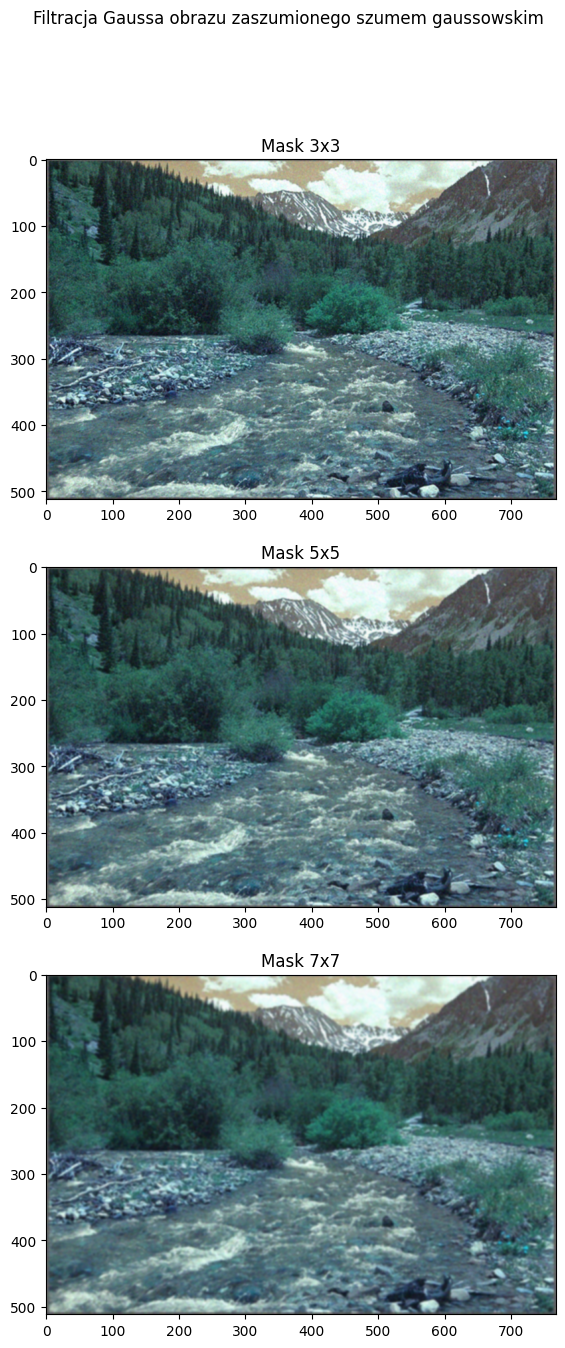

In [88]:
plt.figure(figsize=(10, 15))
plt.suptitle('Filtracja Gaussa obrazu zaszumionego szumem gaussowskim')
for idx, i in enumerate(masks):
    gblur_img = cv2.GaussianBlur(gaus_noise_img, (i, i), 0)
    psnrs[0].append(calcPSNR(oryginal_img, gblur_img))
    plt.subplot(3, 1, idx+1)
    plt.title(f'Mask {i}x{i}')
    plt.imshow(gblur_img)

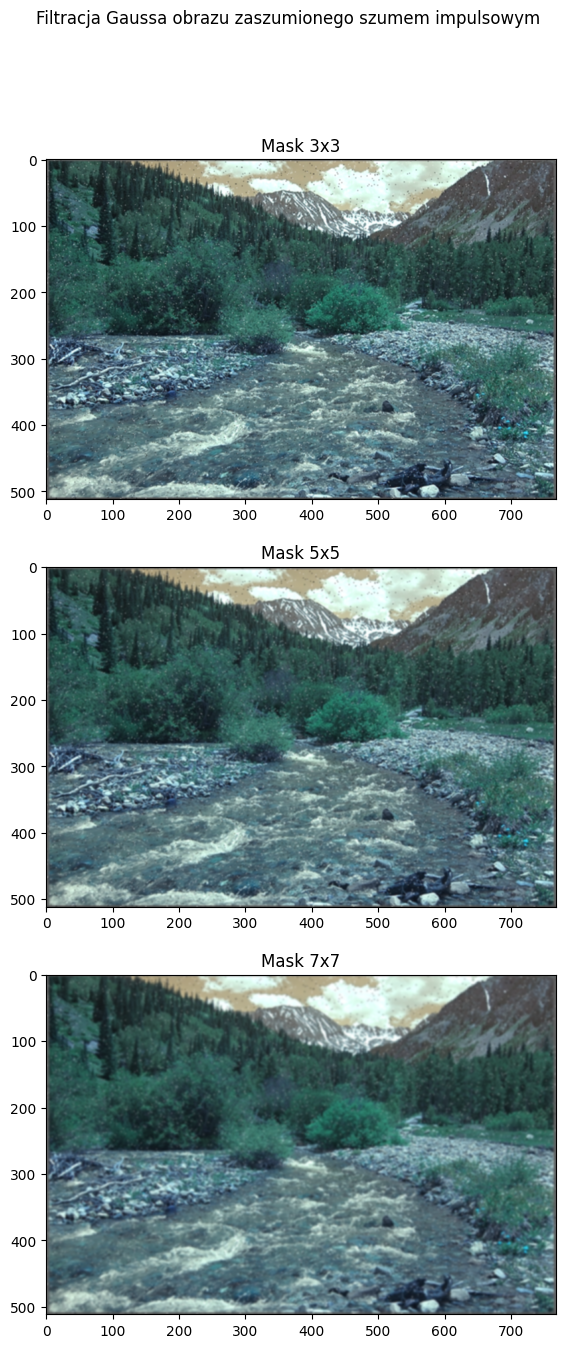

In [89]:
plt.figure(figsize=(10, 15))
plt.suptitle('Filtracja Gaussa obrazu zaszumionego szumem impulsowym')
for idx, i in enumerate(masks):
    gblur_img = cv2.GaussianBlur(inoise1_img, (i, i), 0)
    psnrs[1].append(calcPSNR(oryginal_img, gblur_img))
    plt.subplot(3, 1, idx+1)
    plt.title(f'Mask {i}x{i}')
    plt.imshow(gblur_img)

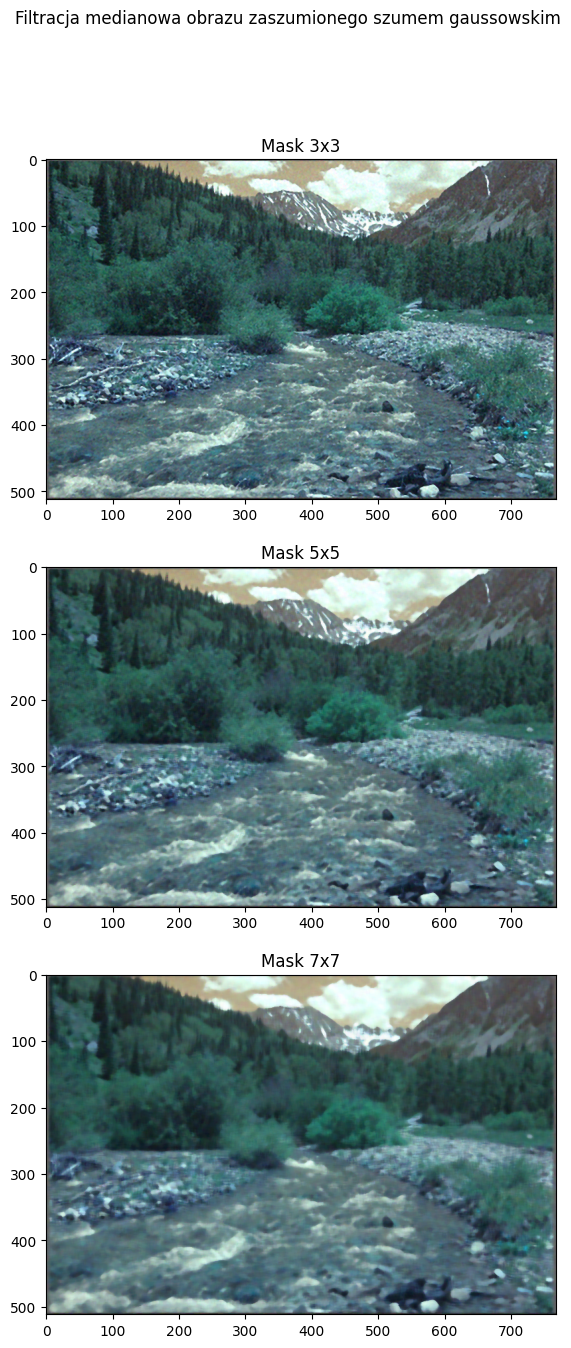

In [90]:
plt.figure(figsize=(10, 15))
plt.suptitle('Filtracja medianowa obrazu zaszumionego szumem gaussowskim')
for idx, i in enumerate(masks):
    mblur_img = cv2.medianBlur(gaus_noise_img, i)
    psnrs[2].append(calcPSNR(oryginal_img, mblur_img))
    plt.subplot(3, 1, idx+1)
    plt.title(f'Mask {i}x{i}')
    plt.imshow(mblur_img)

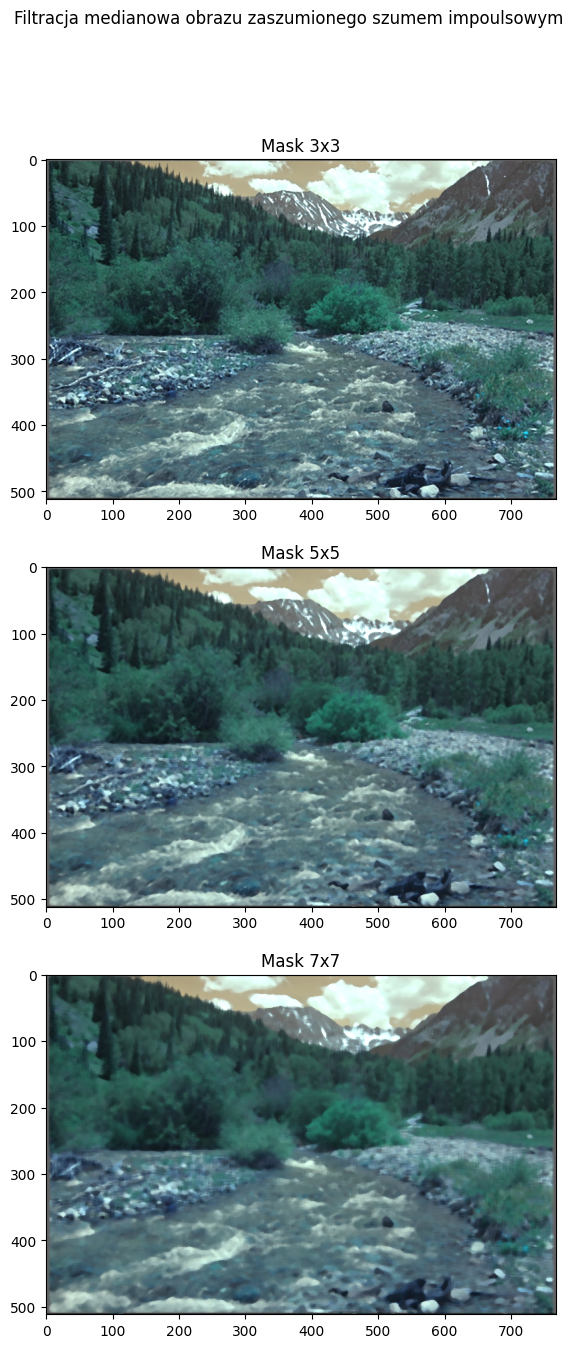

In [91]:
plt.figure(figsize=(10, 15))
plt.suptitle('Filtracja medianowa obrazu zaszumionego szumem impoulsowym')
for idx, i in enumerate(masks):
    mblur_img = cv2.medianBlur(inoise1_img, i)
    psnrs[3].append(calcPSNR(oryginal_img, mblur_img))
    plt.subplot(3, 1, idx+1)
    plt.title(f'Mask {i}x{i}')
    plt.imshow(mblur_img)

In [92]:
# Nazwy filtrów i szumów
index = ['filtr gaussowski, szum gaussowski',
         'filtr gaussowski, szum impulsowy',
         'filtr medianowy, szum gaussowski',
         'filtr medianowy, szum impulsowy']

# Rozmiary masek
columns = ['3x3', '5x5', '7x7']

# Tworzenie DataFrame
df = pd.DataFrame(psnr, index=index, columns=columns)

# Wyświetlanie DataFrame
print(df)

                                         3x3        5x5        7x7
filtr gaussowski, szum gaussowski  24.594911  22.882074  21.608125
filtr gaussowski, szum impulsowy   24.185306  22.715472  21.528174
filtr medianowy, szum gaussowski   23.135861  20.882322  20.108866
filtr medianowy, szum impulsowy    23.727033  20.996052  20.141882


## Wnioski

Z powyższej tabeli wynika że najlepiej się sprawdził filtr gaussowski z maską 3x3, w tej konfiguracji uzyskujemy najwyższy wskaźnik PSNR, co oznacza że moc sygnału jest znacznie większa niż moc szumu, obraz jest mniej zniekształcony i bliższy oryginalnemu. W mojej subiektywnej opinii również jest to zdjęcie o najlepszej jakości.

# Zadanie 2

## Treść

Zrealizować operację wyrównania  histogramu  dla  obrazu  barwnego  i zapisać obraz wynikowy  do 
pliku. UWAGA:  operację  wyrównania  histogramu  należy  wykonać  wyłącznie  dla  składowej 
odpowiadającej  za  jasność,  w  tym  celu  należy  wejściowy  obraz RGB skonwertować  do  innej 
przestrzeni  (np.  YCbCr/YUV), a po wyrównaniu histogramu dla właściwej składowej powrócić do 
pierwotnego formatu.   
Porównać uzyskane obrazy  i  ich  histogramy  (w szczególności: histogram dla składowej, dla której 
wykonano operację wyrównywania histogramu).   
Czy obraz po wyrównaniu histogramu jest subiektywnie lepszej jakości?

## Rozwiązanie

### Histogram dla orginalnego zdjęcia

In [93]:
original_histogram = cv2.calcHist([oryginal_img], [0], None, [256], [0, 256])
original_histogram = original_histogram.flatten()

### Konwersja i wyrównanie histogramu

In [94]:
coverted_img = cv2.cvtColor((oryginal_img), cv2.COLOR_BGR2YUV)
coverted_img[:, :, 0] = cv2.equalizeHist(coverted_img[:, :, 0]) # Y - odpowiedzialny za jasność
equalized_img = cv2.cvtColor(coverted_img, cv2.COLOR_YUV2BGR)

equalized_histogram = cv2.calcHist([equalized_img], [0], None, [256], [0, 256])
equalized_histogram = equalized_histogram.flatten()


In [102]:
cv2.imwrite("equalized_img.png", equalized_img)

True

### Porównanie histogramów

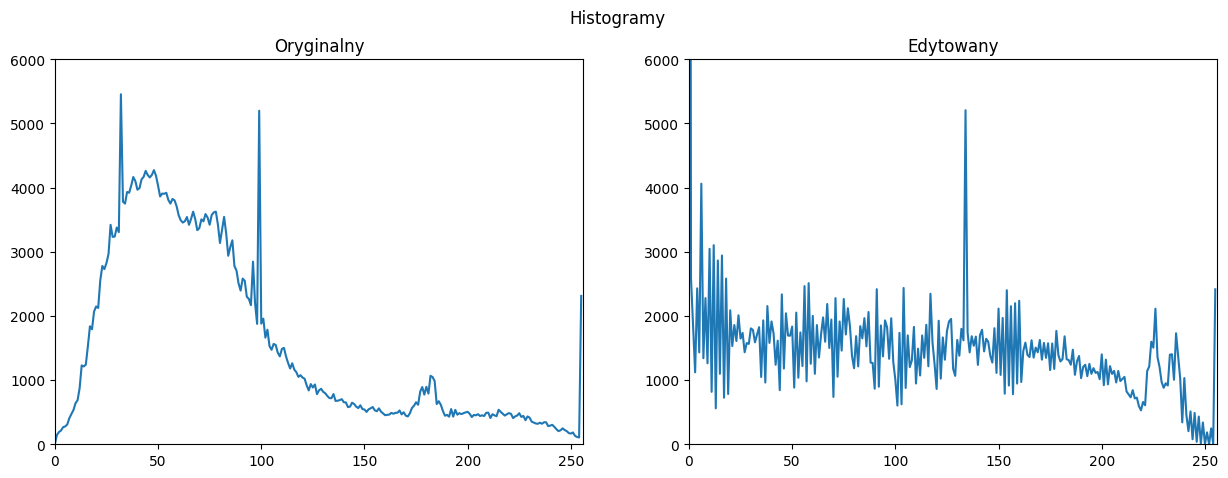

In [108]:
plt.figure(figsize=(15, 5))
plt.suptitle("Histogramy")
plt.subplot(1, 2, 1)
plt.title("Oryginalny")
plt.xlim([0, 256])
plt.ylim([0, 6000])
plt.plot(original_histogram)
plt.subplot(1, 2, 2)
plt.title("Edytowany")
plt.xlim([0, 256])
plt.ylim([0, 6000])
plt.plot(equalized_histogram)


W edytowanym zdjeciu histogram jest stabilniejszy

### Porównanie zdjęć

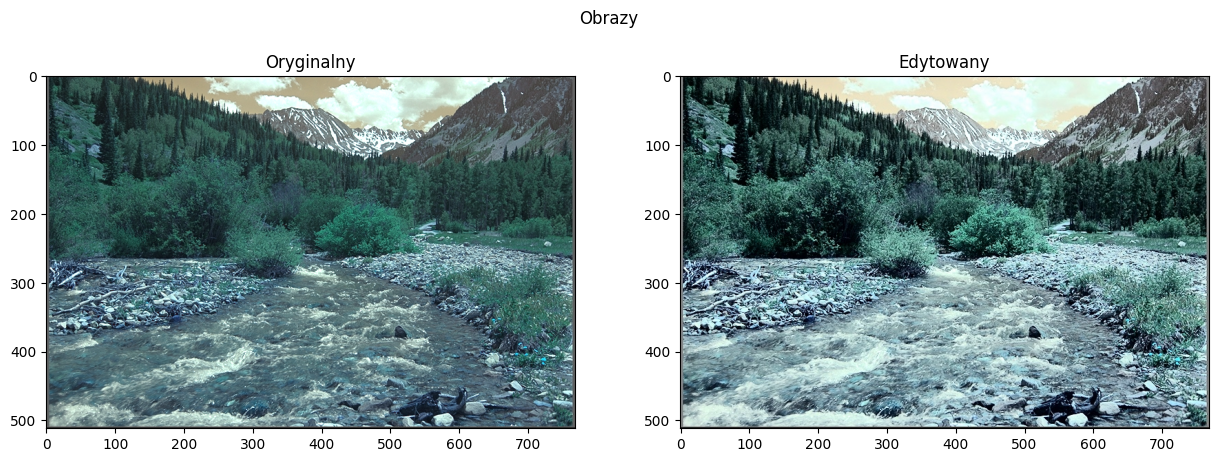

In [107]:
plt.figure(figsize=(15, 5))
plt.suptitle("Obrazy")
plt.subplot(1, 2, 1)
plt.title("Oryginalny")
plt.imshow(oryginal_img)
plt.subplot(1, 2, 2)
plt.title("Edytowany")
plt.imshow(equalized_img)

## Wnioski

Edytowany obraz w moim subiektywnym odbiorze zdecydowanie zyskal na jakości.

# Zad3

## Treść

Korzystając  z  filtru  Laplace’a do  wyznaczenia  wysokoczęstotliwościowych  składowych obrazu 
dokonać wyostrzenia obrazu:  
         img_out = img_in + W*img_laplace.   
Jaki jest wpływ wagi składowej wysokoczęstotliwościowej na postać obrazu wynikowego?   
Dla jakich wartości tej wagi uzyskuje się dobre, przyjemne dla oka wyniki?   
Uwaga: należy pamiętać, że wyostrzanie obrazu powoduje również uwydatnienie szumu w obrazie, w 
niektórych przypadkach (niezbyt dobrej jakości obrazów oryginalnych) przydatne może być wstępne 
wygładzenie obrazu filtrem dolnoprzepustowym (np. filtrem Gaussa)

## Rozwiązanie